# CPA - Leakage detection

In [70]:
import random
import numpy as np
import lascar
lascar.logger.setLevel(lascar.logging.CRITICAL)

import datasets

Session |  0%||0 trc/10000 | (3 engines, batch_size=100000, leakage_shape=(500,)) |ETA:  --:--:--


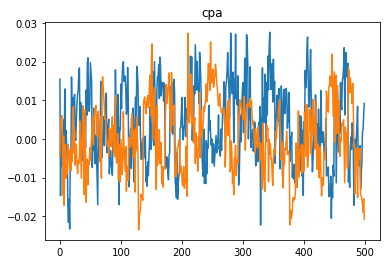

Session |100%||10000 trc/10000 | (3 engines, batch_size=100000, leakage_shape=(500,)) |ETA:  00:00:00
Session |100%||10000 trc/10000 | (3 engines, batch_size=100000, leakage_shape=(500,)) |Time:  0:00:00


In [76]:
data = datasets.dataset('cw_sboxleaky_fixedinput')

trace = lascar.TraceBatchContainer(data["trace"], data)
engine = lascar.CpaEngine(
    name='cpa',
    selection_function=lambda value, guess: random.randint(0, 255) if guess == 0 else value["key"][1],
    guess_range=range(2),
)

session = lascar.Session(trace, engine=engine, output_method=lascar.MatPlotLibOutputMethod(engine))
session.run(batch_size=100_000, thread_on_update=False)